In [2]:
%load_ext autoreload
%autoreload 2

# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import sys
import logging
from tqdm import tqdm
from scipy.spatial.distance import euclidean

# Configure logging to show debug messages only from our project code
# Set root logger to WARNING to suppress debug from other libraries
logging.getLogger().setLevel(logging.DEBUG)


# import the project root
sys.path.insert(0, '../..')
from src.covertree import CoverTree 
from src.dyadictree import DyadicTree
from src.dyadictreenode import DyadicTreeNode
from src.utils import *

from load_mnist import load_dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# ========== NEW: Scikit-learn-like API Demo ==========

# Load fresh MNIST data for the demo
X_demo, original_shape_demo = load_dataset(flatten=True)

# Create a new CoverTree for clean demo
cover_tree_demo = CoverTree(X_demo, euclidean, leafsize=1)

# Create DyadicTree using NEW API (without fitting yet)
dyadic_sklearn = DyadicTree(
    cover_tree=cover_tree_demo,
    manifold_dims=0,      # Expected intrinsic dimension
    max_dim=X_demo.shape[-1],  # Maximum basis dimension  
    thresholds=0.0,       # Thresholds for basis construction
    precisions=1e-2,      # Precision parameters
    inverse=True          # Data in (n,d) format
)

# METHOD 1: Fit and transform separately (like sklearn.decomposition.PCA)
dyadic_sklearn.fit(X_demo)
coeffs_method1, leaf_indices_method1 = dyadic_sklearn.transform(X_demo)
X_recon_method1 = dyadic_sklearn.inverse_transform((coeffs_method1, leaf_indices_method1))

# Calculate reconstruction error
error_method1 = np.mean(np.linalg.norm(X_demo - X_recon_method1, axis=1))


DEBUG:root:Building tree at level 1, node indices: [18 53 42 22 62 93 26 50 14  8 72 39 73 32 48 66 61 68 44 67 40 98 74  6
 46 15 57 29 19 43 91 87 71 96 33 79 89 77 59 11 99  3 23 76 65 78  0 49
  7 27 52 84 64 25 97 41 85 17 55 94  9 75 95 63 21  1 34 69 81 37  2 92
 51 24 56 88 45  4 54  5 20 86 16 38 60 58 10 47 35 90 13 83 82 80 12 31
 30 70 36 28]
DEBUG:root:Updated tree height to 2
DEBUG:root:Processing internal node at level 1 with 34 children
DEBUG:root:Created child 1/34 at level 1
DEBUG:root:Building tree at level 2, node indices: [18 53 42 22 62 93 26 50 14  8 72 39 73 32 48 66 61]
DEBUG:root:Updated tree height to 3
DEBUG:root:Processing internal node at level 2 with 15 children
DEBUG:root:Created child 1/15 at level 2
DEBUG:root:Building tree at level 3, node indices: [18]
DEBUG:root:Updated tree height to 4
DEBUG:root:Created leaf node at level 3 with indices: [18]
DEBUG:root:Created child 2/15 at level 2
DEBUG:root:Building tree at level 3, node indices: [53]
DEBUG:roo

info: making wavelets


DEBUG:root:Point 12: completed, total coefficients at 3 levels
DEBUG:root:Point 13: path length 4, leaf->root traversal
DEBUG:root:Point 13: processed node at (j=2, k=86), qjx shape: (0, 1)
DEBUG:root:Point 13: processed node at (j=1, k=26), qjx shape: (3, 1)
DEBUG:root:Point 13: completed, total coefficients at 4 levels
DEBUG:root:Point 14: path length 5, leaf->root traversal
DEBUG:root:Point 14: processed node at (j=3, k=8), qjx shape: (0, 1)
DEBUG:root:Point 14: processed node at (j=2, k=8), qjx shape: (3, 1)
DEBUG:root:Point 14: processed node at (j=1, k=0), qjx shape: (17, 1)
DEBUG:root:Point 14: completed, total coefficients at 5 levels
DEBUG:root:Point 15: path length 4, leaf->root traversal
DEBUG:root:Point 15: processed node at (j=2, k=23), qjx shape: (0, 1)
DEBUG:root:Point 15: processed node at (j=1, k=3), qjx shape: (12, 1)
DEBUG:root:Point 15: completed, total coefficients at 4 levels
DEBUG:root:Point 16: path length 4, leaf->root traversal
DEBUG:root:Point 16: processed n

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/scratch/f006pq6/softwares/miniconda3/envs/gmra/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizTwoSymReg.ttf', name='STIXSizeTwoSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/scratch/f006pq6/softwares/miniconda3/envs/gmra/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fnam

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/cabin/Cabin-MediumItalic.otf', name='Cabin', style='italic', variant='normal', weight=500, stretch='normal', size='scalable')) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/gentiumplus/GentiumBookPlus-BoldItalic.ttf', name='Gentium Book Plus', style='italic', variant='normal', weight=800, stretch='normal', size='scalable')) = 11.43
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansBrahmi-Regular.ttf', name='Noto Sans Brahmi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/fonts-go/Go-Mono-Bold-Italic.ttf', name='Go Mono', style='italic', variant='normal', weight=600, stretch='normal', size='scalable')) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/us


4. Visualizing first 10 examples: Original vs Reconstructed


DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/NimbusSansNarrow-Oblique.otf', name='Nimbus Sans Narrow', style='oblique', variant='normal', weight=400, stretch='condensed', size='scalable')) = 11.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansPahawhHmong-Regular.ttf', name='Noto Sans Pahawh Hmong', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/lobstertwo/LobsterTwo-Italic.otf', name='Lobster Two', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansOriya-Bold.ttf', name='Noto Sans Oriya', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:f

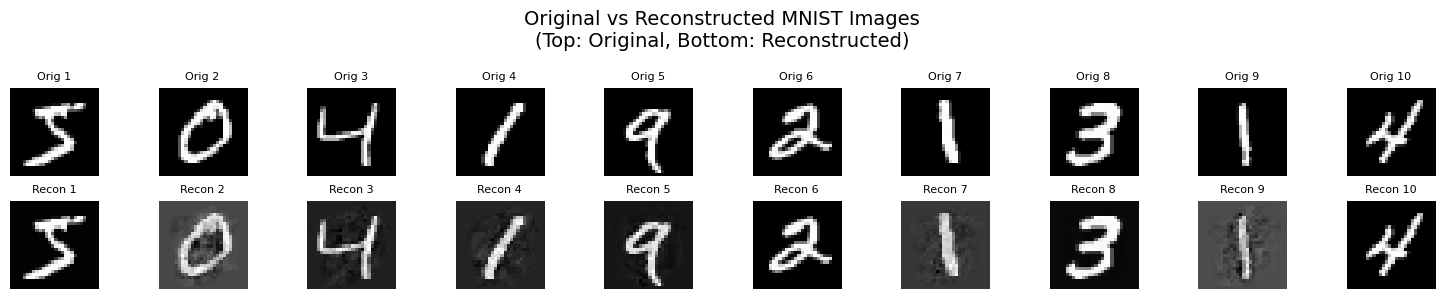

In [4]:
# ========== VISUALIZATION: Original vs Reconstructed Images ==========
print("\n4. Visualizing first 10 examples: Original vs Reconstructed")

# Reshape data back to image format (28x28 for MNIST)
X_demo_images = X_demo[:10].reshape(-1, 28, 28)
X_recon_images = X_recon_method1[:10].reshape(-1, 28, 28)

# Create subplot with 2 rows and 10 columns
fig, axes = plt.subplots(2, 10, figsize=(15, 3))
fig.suptitle('Original vs Reconstructed MNIST Images\n(Top: Original, Bottom: Reconstructed)', fontsize=14)

# Display original images in first row
for i in range(10):
    axes[0, i].imshow(X_demo_images[i], cmap='gray')
    axes[0, i].set_title(f'Orig {i+1}', fontsize=8)
    axes[0, i].axis('off')

# Display reconstructed images in second row
for i in range(10):
    axes[1, i].imshow(X_recon_images[i], cmap='gray')
    axes[1, i].set_title(f'Recon {i+1}', fontsize=8)
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

In [16]:
len(dyadic_sklearn.root[9].idxs)

3

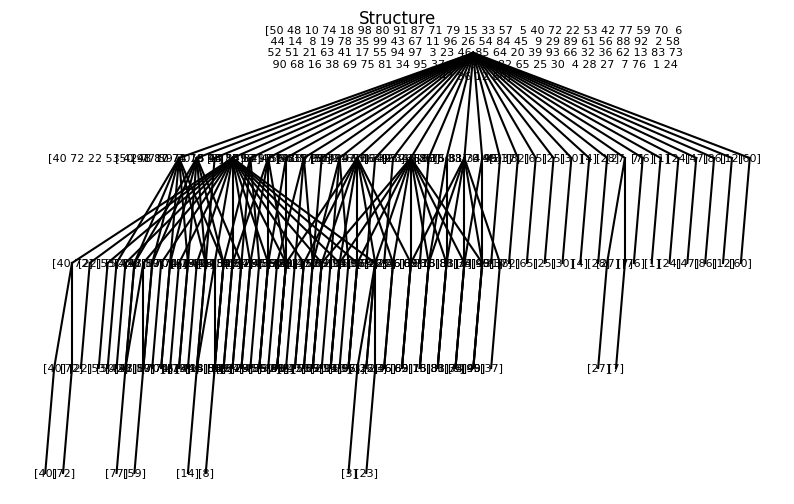

In [19]:
dyadic_sklearn.plot_tree()